<a href="https://colab.research.google.com/github/GuilhermeVasconcellos/DataScience/blob/main/C%C3%B3pia_de_ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Conhecendo o Dataset

In [ ]:
df = pd.read_csv('train.csv', index_col='id')

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5,57,retired,married,basic.6y,NaN,no,no,cellular,apr,fri,203,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
6,48,technician,single,professional.course,no,yes,no,cellular,may,wed,142,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
7,45,blue-collar,married,basic.4y,NaN,yes,yes,telephone,jun,tue,825,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
8,30,blue-collar,single,high.school,NaN,yes,no,telephone,may,wed,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


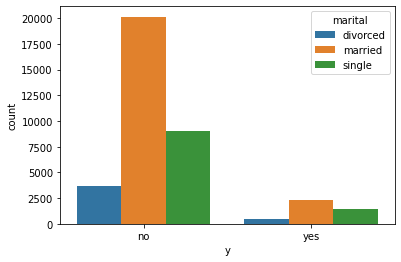

In [ ]:
sns.countplot(data=df, x='y', hue='marital')

In [ ]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

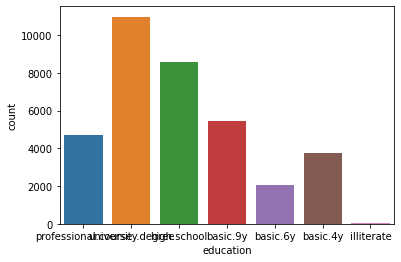

In [ ]:
sns.countplot(data=df, x='education')

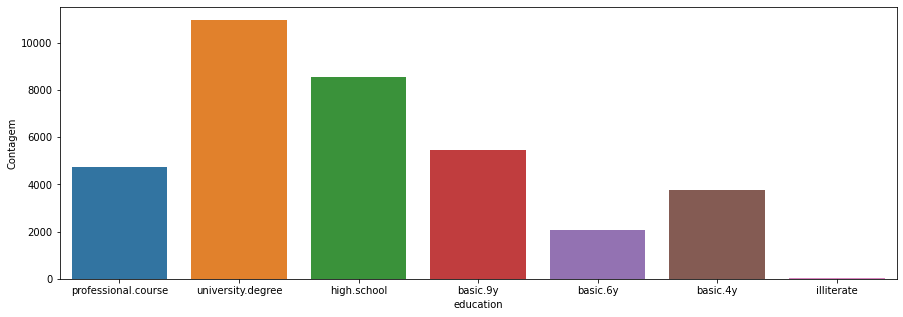

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education')
plt.ylabel('Contagem')
plt.show()

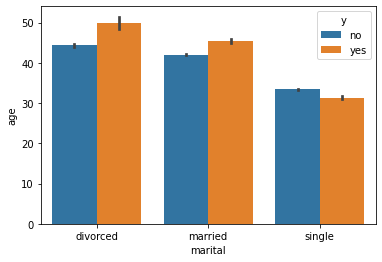

In [ ]:
sns.barplot(data=df, x='marital', y='age', hue='y')

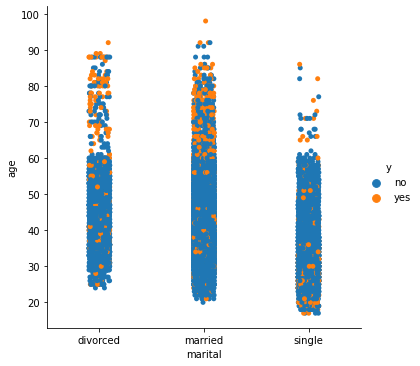

In [ ]:
sns.catplot(data=df, x='marital', y='age', hue='y')
plt.show()

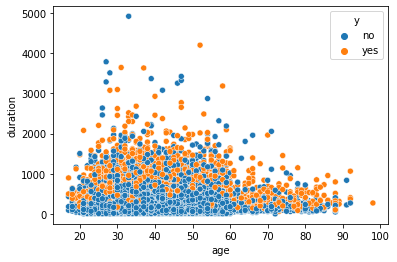

In [ ]:
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

# Modelando

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

In [ ]:
#Transforma os objetos em categorias
for c in df.columns[df.dtypes == object]: # df.dtypes == 'object'
    df[c] = df[c].astype('category')

In [ ]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [ ]:
#Transforma as categorias em números
for c in df.columns[df.dtypes == 'category']: # df.dtypes == 'object'
    df[c] = df[c].cat.codes

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [ ]:
#Separa os labels do conjunto de parâmetros
y = df.y
X = df.drop('y', axis=1)

In [ ]:
#Visualização do conjunto de treino
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
id,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31508, 20), (5561, 20), (31508,), (5561,))

In [ ]:
# vericando a divisão
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
df_norm = pd.DataFrame(X_norm, columns=df.columns.drop('y'))

In [ ]:
df_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [ ]:

knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_class.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561



Submissão ao Kagle

In [ ]:
#pipeline para realizar os k-folds no conjunto de treino
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=200))
#grid de Hiperparâmetros para serem testados
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', None, 'log2'],
                  'randomforestclassifier__max_depth': [None, 3, 1]}
# Grid para k-fold de 10 dobras
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [ ]:
%%time
#Ajusta o modelo aos dados de treino
model=clf.fit(X,y2)

In [ ]:
p = model.predict(test)

In [ ]:
#vizualização dos dados a serem submetidos
#sample.y= p
#sample.to_csv("~/submission.csv",index=False)
#sample.head()

# Métricas de avaliação

In [ ]:
solution = pd.read_csv('solution.csv').y
naive = pd.read_csv('allzeros.csv').y
rf = pd.read_csv('random_forest.csv').y

In [ ]:
# F1 de cada categoria
metrics.f1_score(solution, naive, pos_label=0), metrics.f1_score(solution, naive, pos_label=1)

(0.9403138667352715, 0.0)

In [ ]:
metrics.f1_score(solution, naive, average=None)

array([0.94031387, 0.        ])

In [ ]:
metrics.f1_score(solution, naive, average='micro'), metrics.f1_score(solution, naive, average='macro')

(0.8873512988589464, 0.47015693336763575)

In [ ]:
metrics.accuracy_score(solution,naive)

0.8873512988589464

In [ ]:
metrics.precision_score(solution, naive, average=None), metrics.recall_score(solution, naive, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]), array([1., 0.]))

In [ ]:
metrics.precision_recall_fscore_support(solution, naive)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.8873513, 0.       ]),
 array([1., 0.]),
 array([0.94031387, 0.        ]),
 array([3655,  464]))

In [ ]:
print(metrics.classification_report(solution, rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3655
           1       0.70      0.52      0.59       464

    accuracy                           0.92      4119
   macro avg       0.82      0.74      0.77      4119
weighted avg       0.91      0.92      0.92      4119

